In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
df = pd.read_csv("/Users/sylvie/Documents/5507类型/现代言情/merge_xy_cleaned.csv", encoding='utf-8-sig')


In [ ]:
df['comment_time'] = pd.to_datetime(df['日期'], errors='coerce')  
df = df.dropna(subset=['comment_time'])

df['total_minutes'] = df['comment_time'].dt.hour * 60 + df['comment_time'].dt.minute
df['20min_group'] = df['total_minutes'] // 20
def get_group_start_time(group_num):
    total_min = group_num * 20
    hour = total_min // 60
    minute = total_min % 60
    return f"{hour:02d}:{minute:02d}"  
df['20min_start'] = df['20min_group'].apply(get_group_start_time)
df['20min_num'] = df['20min_group'] * 20 / 60  # 2


图表已保存至：/Users/sylvie/Documents/5507_Category/Modern_Romance_Short_Dramas/24H_Comment_Frequency_20Min_Interval.png


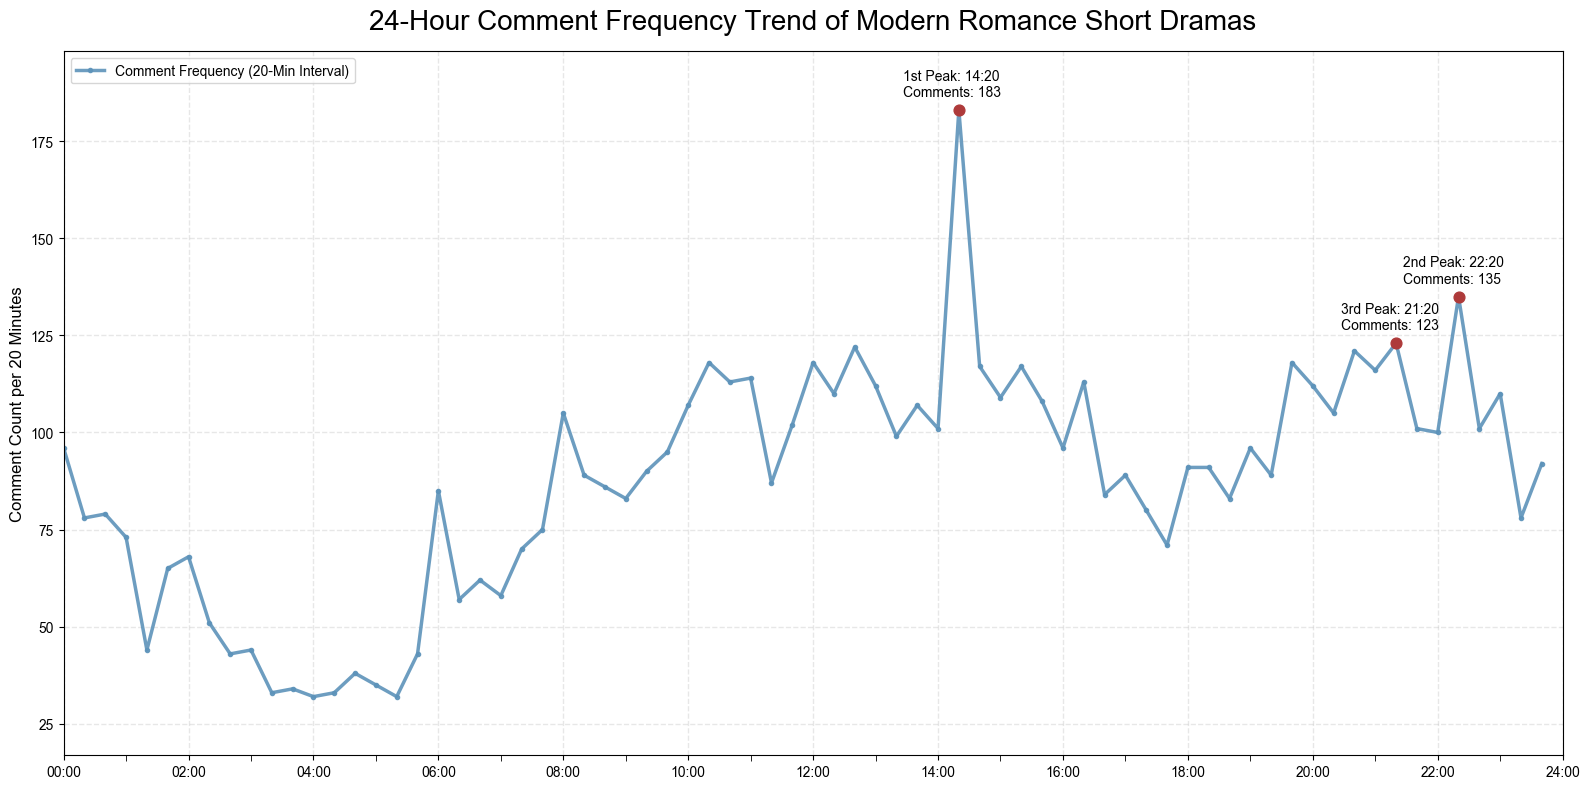

In [ ]:
comment_freq = df.groupby(['20min_num', '20min_start']).size().reset_index(name='comment_count')
comment_freq = comment_freq.sort_values('20min_num').reset_index(drop=True)

top3_peaks = comment_freq.nlargest(3, 'comment_count').reset_index(drop=True)
top3_peaks['rank'] = ['1st', '2nd', '3rd']

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(
    comment_freq['20min_num'], 
    comment_freq['comment_count'],
    color="#5d93ba", 
    linewidth=2.5,  
    alpha=0.9,
    marker='o',  
    markersize=3,
    label='Comment Frequency (20-Min Interval)'
)

for _, peak in top3_peaks.iterrows():
    ax.scatter(
        peak['20min_num'], 
        peak['comment_count'],
        color="#AE3A3A", 
        s=60,  
        zorder=5  
    )
top3_peaks = top3_peaks.reset_index()
top3_peaks['rank'] = [f"{i+1}st" if i==0 else f"{i+1}nd" if i==1 else f"{i+1}rd" for i in range(len(top3_peaks))]
    
for _, peak in top3_peaks.iterrows():
    ax.annotate(
        f"{peak['rank']} Peak: {peak['20min_start']}\nComments: {peak['comment_count']}", 
        xy=(peak['20min_num'], peak['comment_count']),
        xytext=(-40, 10),
        textcoords="offset points",
        fontweight="bold",
        color="black"
    )


ax.set_xlim(0, 24)
ax.set_xticks(range(0, 25, 2))
ax.set_xticklabels([f"{h:02d}:00" for h in range(0, 25, 2)])
ax.set_xticks(range(0, 24), minor=True)
ax.tick_params(axis='x', which='minor', length=4)


ax.set_ylabel('Comment Count per 20 Minutes', fontsize=12, fontweight='medium')  
ax.set_title('24-Hour Comment Frequency Trend of Modern Romance Short Dramas', fontsize=20, fontweight='bold', pad=16)


ax.grid(True, alpha=0.3, linestyle='--', linewidth=1)
ax.legend(fontsize=10, loc='upper left')
ax.margins(y=0.1)

plt.tight_layout()

import os
save_folder = r"/Users/sylvie/Documents/5507_Category/Modern_Romance_Short_Dramas"
save_path = os.path.join(save_folder, "24H_Comment_Frequency_20Min_Interval.png")
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"图表已保存至：{save_path}")

plt.show()